In [73]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, roc_auc_score

## Carregando e analisando a base de dados

In [74]:
df = pd.read_csv("loan_default.csv")

df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,164194,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,851,CIB,35-44,to_inst,57.593458,south,direct,0,45.0
148666,165831,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,645,EXP,65-74,to_inst,57.593458,south,direct,0,36.0
148667,100880,2019,cf,Sex Not Available,nopre,type2,p3,l1,nopc,b/c,...,CIB,525,EXP,55-64,to_inst,92.725989,south,direct,1,44.0
148668,138588,2019,cf,Sex Not Available,nopre,type3,p4,l1,nopc,nob/c,...,EXP,798,CIB,45-54,to_inst,92.725989,south,direct,0,NaN


In [75]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co_applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

Showing null data

In [76]:
# verificando quantidade de nulos
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_applic

<Axes: xlabel='Status', ylabel='Count'>

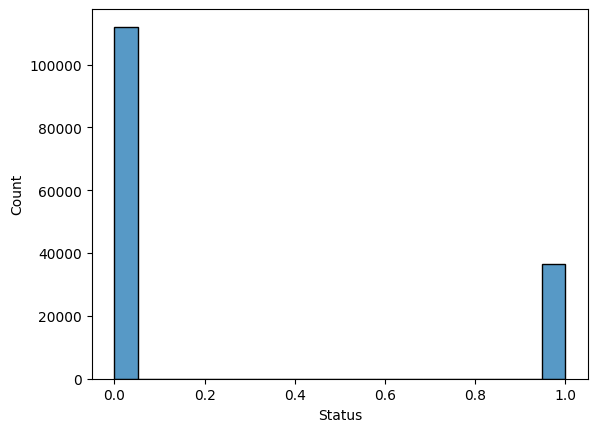

In [77]:
# Verificando distribuição da variavel target
# 0 - adimplência, 1 - indimplencia
sns.histplot(df['Status'])

Analisando colunas que possuem nan

In [78]:
df['loan_limit'].unique()

array(['cf', 'ncf', nan], dtype=object)

In [79]:
df['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [80]:
df['Neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [81]:
df['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

In [82]:
df['age'].unique()

array(['55-64', '45-54', '35-44', '>74', '25-34', '65-74', '<25', nan],
      dtype=object)

In [83]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [84]:
df['rate_of_interest'].unique()

array([  nan, 3.5  , 4.25 , 2.75 , 2.875, 3.75 , 4.5  , 3.875, 4.125,
       4.75 , 3.625, 5.25 , 5.125, 4.375, 3.375, 3.99 , 4.99 , 4.875,
       4.   , 4.49 , 3.49 , 5.375, 3.125, 4.625, 3.25 , 4.56 , 2.99 ,
       3.   , 3.69 , 3.56 , 5.99 , 5.5  , 5.875, 5.69 , 5.625, 5.19 ,
       5.75 , 6.5  , 6.24 , 4.18 , 3.725, 6.25 , 3.8  , 4.05 , 5.   ,
       3.425, 3.55 , 3.225, 3.975, 3.15 , 3.925, 4.95 , 6.   , 2.975,
       5.74 , 3.4  , 3.175, 2.625, 6.125, 3.025, 4.44 , 4.3  , 3.1  ,
       3.93 , 3.775, 2.25 , 3.575, 4.15 , 5.49 , 7.   , 3.325, 4.4  ,
       2.6  , 3.3  , 3.675, 2.925, 3.35 , 3.525, 3.825, 3.05 , 8.   ,
       6.75 , 2.725, 6.875, 4.225, 3.85 , 3.7  , 3.65 , 2.65 , 3.9  ,
       4.175, 3.275, 2.7  , 2.675, 2.85 , 4.475, 2.5  , 2.9  , 2.375,
       3.45 , 3.95 , 3.2  , 3.475, 2.775, 4.2  , 4.7  , 2.95 , 3.075,
       3.6  , 4.075, 2.575, 4.425, 7.75 , 7.375, 4.35 , 2.475, 2.8  ,
       2.125, 4.1  , 4.55 , 4.325, 4.82 , 4.025, 7.5  , 4.865, 6.375,
       4.275, 3.74 ,

In [85]:
df['Interest_rate_spread'].unique()

array([    nan, -0.2735, -0.1358, ...,  1.6276, -0.6781, -0.5163])

In [86]:
df['Upfront_charges'].unique()

array([    nan, 2931.19,    0.  , ..., 3427.25, 4661.38, 1190.05])

In [87]:
df['term'].unique()

array([360., 240., 324., 180., 144.,  nan, 156., 276., 300., 312., 120.,
       216.,  96., 336., 108., 288., 192., 165., 348., 132., 204., 228.,
       168., 264., 280., 252., 322.])

In [88]:
df['property_value'].unique()

array([       nan, 1.4080e+06, 4.4800e+05, 1.2800e+05, 6.0800e+05,
       1.2480e+06, 2.2800e+05, 1.4800e+05, 6.8000e+04, 1.6480e+06,
       6.8800e+05, 1.3280e+06, 1.0080e+06, 3.6800e+05, 4.8000e+04,
       2.8800e+05, 1.6800e+05, 3.2800e+05, 4.8800e+05, 6.4800e+05,
       7.6800e+05, 2.0800e+05, 5.2800e+05, 8.4800e+05, 9.2800e+05,
       4.0800e+05, 5.6800e+05, 1.0880e+06, 4.6080e+06, 4.7800e+05,
       5.0800e+05, 7.9800e+05, 3.8000e+04, 9.5800e+05, 6.2800e+05,
       2.3580e+06, 2.5800e+05, 5.1800e+05, 8.3800e+05, 3.2080e+06,
       7.5800e+05, 9.9800e+05, 3.8800e+05, 5.3800e+05, 1.9580e+06,
       7.3800e+05, 1.0780e+06, 1.0480e+06, 3.1800e+05, 3.5800e+05,
       1.0180e+06, 1.0280e+06, 2.6800e+05, 8.2800e+05, 2.8180e+06,
       1.9180e+06, 6.7800e+05, 5.9800e+05, 3.0800e+05, 3.3080e+06,
       2.4800e+05, 3.4280e+06, 6.9800e+05, 5.8800e+05, 1.6880e+06,
       4.3800e+05, 9.4800e+05, 1.1780e+06, 2.7800e+05, 1.3580e+06,
       8.0800e+05, 1.3480e+06, 1.3780e+06, 1.0800e+05, 2.9800e

In [89]:
df['income'].unique()

array([ 4980.,     0.,  8640., ..., 58140., 54180., 86340.])

In [90]:
df['LTV'].unique()

array([        nan, 48.046875  , 46.09375   , ..., 22.46328438,
       54.87435009, 64.9504084 ])

In [91]:
df['dtir1'].unique()

array([nan, 18., 20., 42., 37., 23., 31., 35., 44., 45., 46., 36.,  7.,
       43., 30., 54., 28., 49.,  9., 48., 41., 50., 40., 27., 39., 47.,
       38., 55.,  8., 12., 25., 34., 21., 56., 26.,  5., 33., 22., 32.,
       15., 24., 51., 13., 11., 53., 52., 59., 10., 29., 19., 61., 58.,
       60.,  6., 17., 57., 14., 16.])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Pipeline

In [93]:
categorical_features  = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization','interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co_applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
numerical_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

## Tratando a Base de dados para treinar o modelo

In [94]:
# Apagando colunas que não possuem dados relevantes para o modelo
df = df.drop(columns=['ID', 'year'], axis=1)

In [95]:
# Transformado colunas categoricas em dummies
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('oneHot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

In [97]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('logistic-regression', LogisticRegression(max_iter=1000))
    ]
)

## 3.	Modelo de propensão de inadimplência:

In [98]:
# Treinando o modelo com as variáveis selecionadas

y = df['Status']
X = df.drop(['Status'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred_labels = model.predict(X_test)

# # Avaliação de desempenho
print("Avaliação de Desempenho:")
print(classification_report(y_test, y_pred_labels))

Avaliação de Desempenho:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22430
           1       0.92      0.51      0.66      7304

    accuracy                           0.87     29734
   macro avg       0.89      0.75      0.79     29734
weighted avg       0.88      0.87      0.86     29734



In [116]:
x = X.dropna()

a = x.head(1)

In [117]:
a

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
4499,ncf,Male,nopre,type1,p4,l1,nopc,nob/c,676500,3.5,...,16680.0,CIB,792,CIB,45-54,to_inst,48.046875,North,direct,20.0


In [131]:
strg = "{"
for column in a.columns:
    

    value = a[column]

    strg += f"""{column}: '{value.to_dict()[4499]}',"""

strg += "}"
print(strg)

{loan_limit: 'ncf',Gender: 'Male',approv_in_adv: 'nopre',loan_type: 'type1',loan_purpose: 'p4',Credit_Worthiness: 'l1',open_credit: 'nopc',business_or_commercial: 'nob/c',loan_amount: '676500',rate_of_interest: '3.5',Interest_rate_spread: '-0.2735',Upfront_charges: '2931.19',term: '360.0',Neg_ammortization: 'not_neg',interest_only: 'not_int',lump_sum_payment: 'not_lpsm',property_value: '1408000.0',construction_type: 'sb',occupancy_type: 'pr',Secured_by: 'home',total_units: '1U',income: '16680.0',credit_type: 'CIB',Credit_Score: '792',co_applicant_credit_type: 'CIB',age: '45-54',submission_of_application: 'to_inst',LTV: '48.046875',Region: 'North',Security_Type: 'direct',dtir1: '20.0',}


In [ ]:
joblib.dump(a, 'variable.joblib')

['variable.joblib']

In [ ]:
joblib.dump(model, 'propensao_inadimplencia_classification.joblib')

['propensao_inadimplencia_classification.joblib']